In [1]:
import torch
import json
import numpy as np
from figures import groupes_politiques, pi_df, text_legend_row, generate_alphabet_text_array, fig_17
from utils import load_objects_from_yaml
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import yaml

In [2]:
##############" LOADING DATASET" ################

votes = np.loadtxt("data_parliament/votes.txt",delimiter=";").astype(int)

deputes = json.load(open('data_parliament/deputes.json', 'r')) 
#deputes: Dataset with: Family name, Name, Political group 
texts = json.load(open('data_parliament/texts.json', 'r'))
#texts: Dataset with: political group demanding, title of demand, date, type (type of vote, type of majority, name of type of vote), 

n1, n2 = votes.shape 

# Shape of dataset: 
print("row length (nb of persons): ",n1)
print("col length (nb of laws): ",n2)

row length (nb of persons):  576
col length (nb of laws):  1256


In [3]:
##############" LOADING Arguments" ################
#%env PYTORCH_MPS_HIGH_WATERMARK_RATIO=0.0

nq = 3 #enter nb of row classes
nl = 5 #enter nb of col classes
device = 'mps' #put 'cuda' or 'cpu'
device2 = 'mps' #put None or 'cuda'

if not torch.backends.mps.is_available() and device != 'cpu':
    print('Cuda is not available. Algorithm will use cpu')
    device, device2 = torch.device('cpu'), None

In [4]:
loaded_parameters = load_objects_from_yaml('trained_parameters.yaml')
print(loaded_parameters)

{'alpha_1': [[0.3266546130180359], [0.29105791449546814], [0.3822874128818512]], 'alpha_2': [[0.26258522272109985, 0.14688949286937714, 0.23319298028945923, 0.17464996874332428, 0.18268226087093353]], 'mu_un': [[-4.325070381164551]], 'nu_a': [[2.834761381149292], [-10.638897895812988], [0.5077277421951294], [1.9285552501678467], [0.04434923455119133], [0.5606055855751038], [2.5241425037384033], [1.2146705389022827], [2.6964056491851807], [1.8197827339172363], [0.8712793588638306], [2.339041233062744], [1.4306734800338745], [-0.9597340226173401], [-2.0290322303771973], [-0.9012367725372314], [2.2684288024902344], [1.5177412033081055], [1.6655678749084473], [0.9859455227851868], [1.2750829458236694], [0.16082075238227844], [1.2373647689819336], [1.3953251838684082], [2.150327682495117], [1.5967395305633545], [0.30310726165771484], [-10.89326000213623], [1.126607060432434], [2.277477502822876], [0.2566679120063782], [1.3848979473114014], [1.1402596235275269], [0.06828942149877548], [2.027

In [5]:
pi = np.array(loaded_parameters['pi'])

tau_1 = np.array(loaded_parameters['tau_1'])
tau_2 = np.array(loaded_parameters['tau_2'])
row_classes = tau_1.argmax(axis=1)
column_classes = tau_2.argmax(axis=1)

nu_a = np.array(loaded_parameters['nu_a'])
nu_b = np.array(loaded_parameters['nu_b'])
nu_c = np.array(loaded_parameters['nu_p'])
nu_d = np.array(loaded_parameters['nu_q'])

### Figure 17

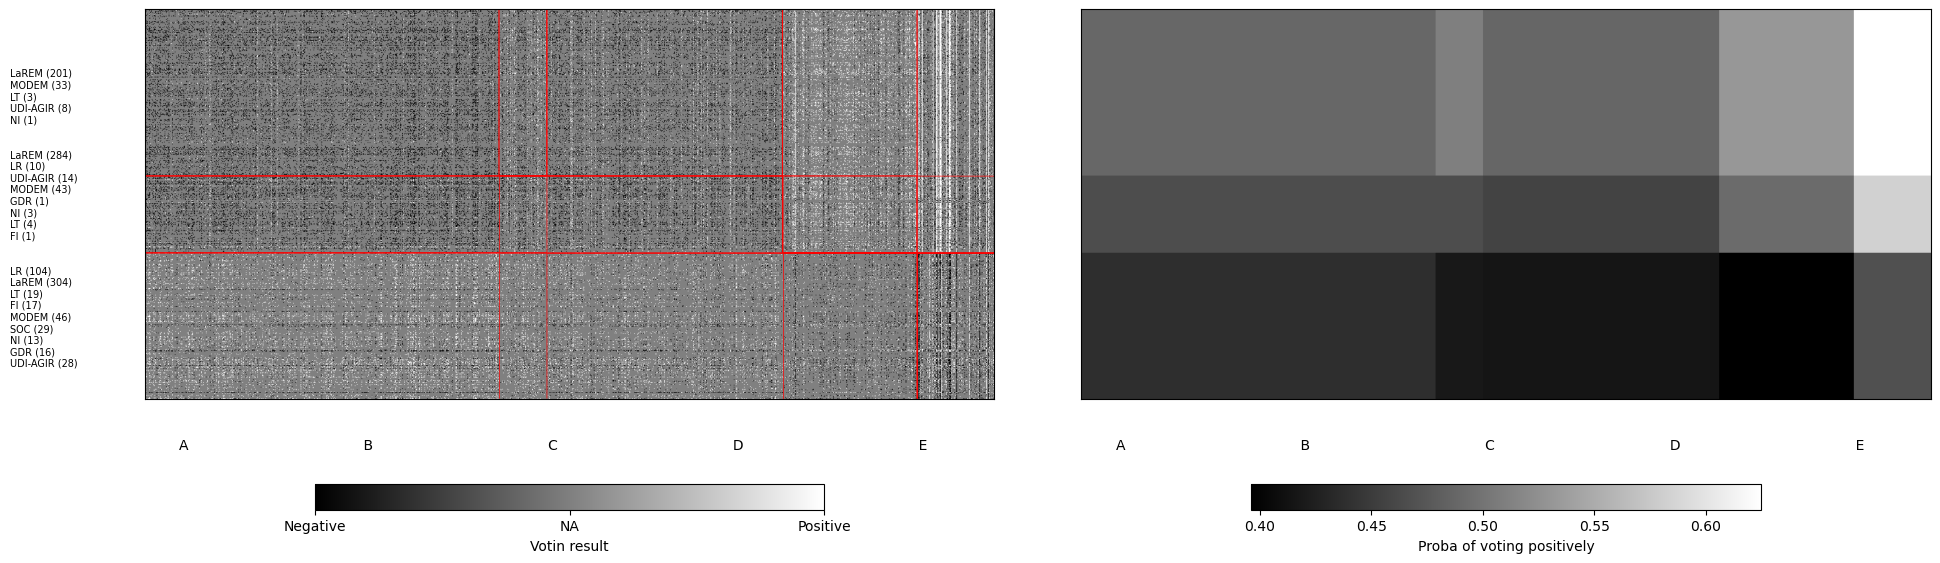

In [6]:
fig_17(votes, deputes, row_classes, column_classes, pi)